# Adapted from CS109a Introduction to Data Science
## Seminar 8, Exercise 1: Visualizing a Decision Tree

## Description :
The aim of this exercise is to visualize the decision tree that is created when performing Decision Tree Classification or Regression.

## Data Description:
We are trying to predict the winner of the 2016 Presidential election (Trump vs. Clinton) in each county in the US.  To do this, we will consider several predictors including  minority: the percentage of residents that are minorities and bachelor: the percentage of resident adults with a bachelor's degree (or higher).

## Instructions:

- Read the datafile `county_election_train.csv` into a Pandas data frame.
- Create the response variable based on the columns `trump` and `clinton`.
- Initialize a Decision Tree classifier of depth 3 and fit on the training data.
- Visualise the Decision Tree.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.DecisionTreeClassifier()</a>Generates a Logistic Regression classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">classifier.fit()</a>Build a decision tree classifier from the training set (X, y).

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">plt.scatter()</a>A scatter plot of y vs. x with varying marker size and/or color.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.xlabel()</a>Set the label for the x-axis.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html" target="_blank">plt.ylabel()</a>Set the label for the y-axis.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html" target="_blank">plt.legend()</a>Place a legend on the Axes.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html" target="_blank">tree.plot_tree()</a>Plot a decision tree.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [2]:
# Read the datafile "county_level_election.csv" as a Pandas dataframe
data = pd.read_csv("C:\\Users\\wirze\\DataspellProjects\\DS_DAPS\\8-lab\\data\\county_level_election.csv")
# split in into test and train
elect_train, elect_test = train_test_split(data)

# Take a quick look at the dataframe
elect_train.head()
elect_test.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
630,Texas,48023,Baylor County,3677,13.378,6.136,51.244,3.6,36027,15.4,22.4,25.7,28.1,83.5,185.9,72.118,84.920,12.802
53,Texas,48493,Wilson County,40749,39.036,4.819,49.747,3.8,62752,15.5,18.5,21.7,31.4,378.0,109.3,47.785,72.662,24.877
475,Virginia,51005,Alleghany County,16242,1.454,6.915,50.966,5.1,45454,15.8,16.9,27.1,33.0,137.3,170.2,37.065,66.699,29.633
2565,Georgia,13301,Warren County,5755,1.099,61.319,53.132,7.7,31623,29.6,8.0,30.3,32.0,20.5,279.5,-13.808,42.496,56.304
2634,Kentucky,21197,Powell County,13566,1.312,2.193,50.583,7.2,32783,26.4,13.6,30.3,36.3,82.6,284.7,45.209,70.869,25.661


In [3]:
len(elect_test)

767

In [4]:
# Creating the response variable

# Set all the rows in the train data where "trump" value is more than "clinton" as 1
y_train = (elect_train['trump'] > elect_train['clinton'])\
    .astype(int)

# Set all the rows in the test data where "trump" value is more than "clinton" as 1
y_test = (elect_test['trump'] > elect_test['clinton'])\
    .astype(int)
y_test.head()

630     1
53      1
475     1
2565    0
2634    1
dtype: int32

<AxesSubplot:xlabel='minority', ylabel='bachelor'>

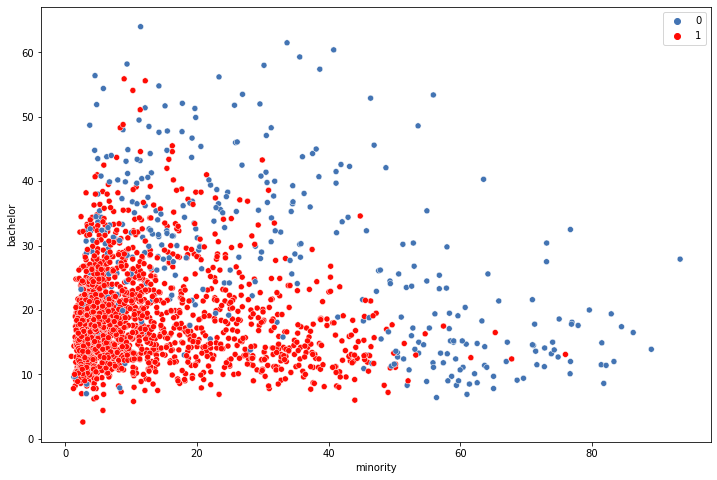

In [5]:
# Plot "minority" vs "bachelor" as a scatter plot
# Set colours red for Trump and blue for Clinton

# Create an array with the colors you want to use
colors = ["#4374B3", "#FF0B04"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

# Your code here
sns.scatterplot(
    data = elect_train,
    x = "minority",
    y = "bachelor",
    hue = y_train,
    palette = customPalette
)

In [6]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [7]:
# Initialize a Decision Tree classifier of depth 3 and choose
# splitting criteria to be the gini
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

# Fit the classifier on the train data
# but only use the minority column as the predictor variable
dtree.fit(X = elect_train['minority'].values.reshape(-1, 1), y = y_train)


DecisionTreeClassifier(max_depth=3)

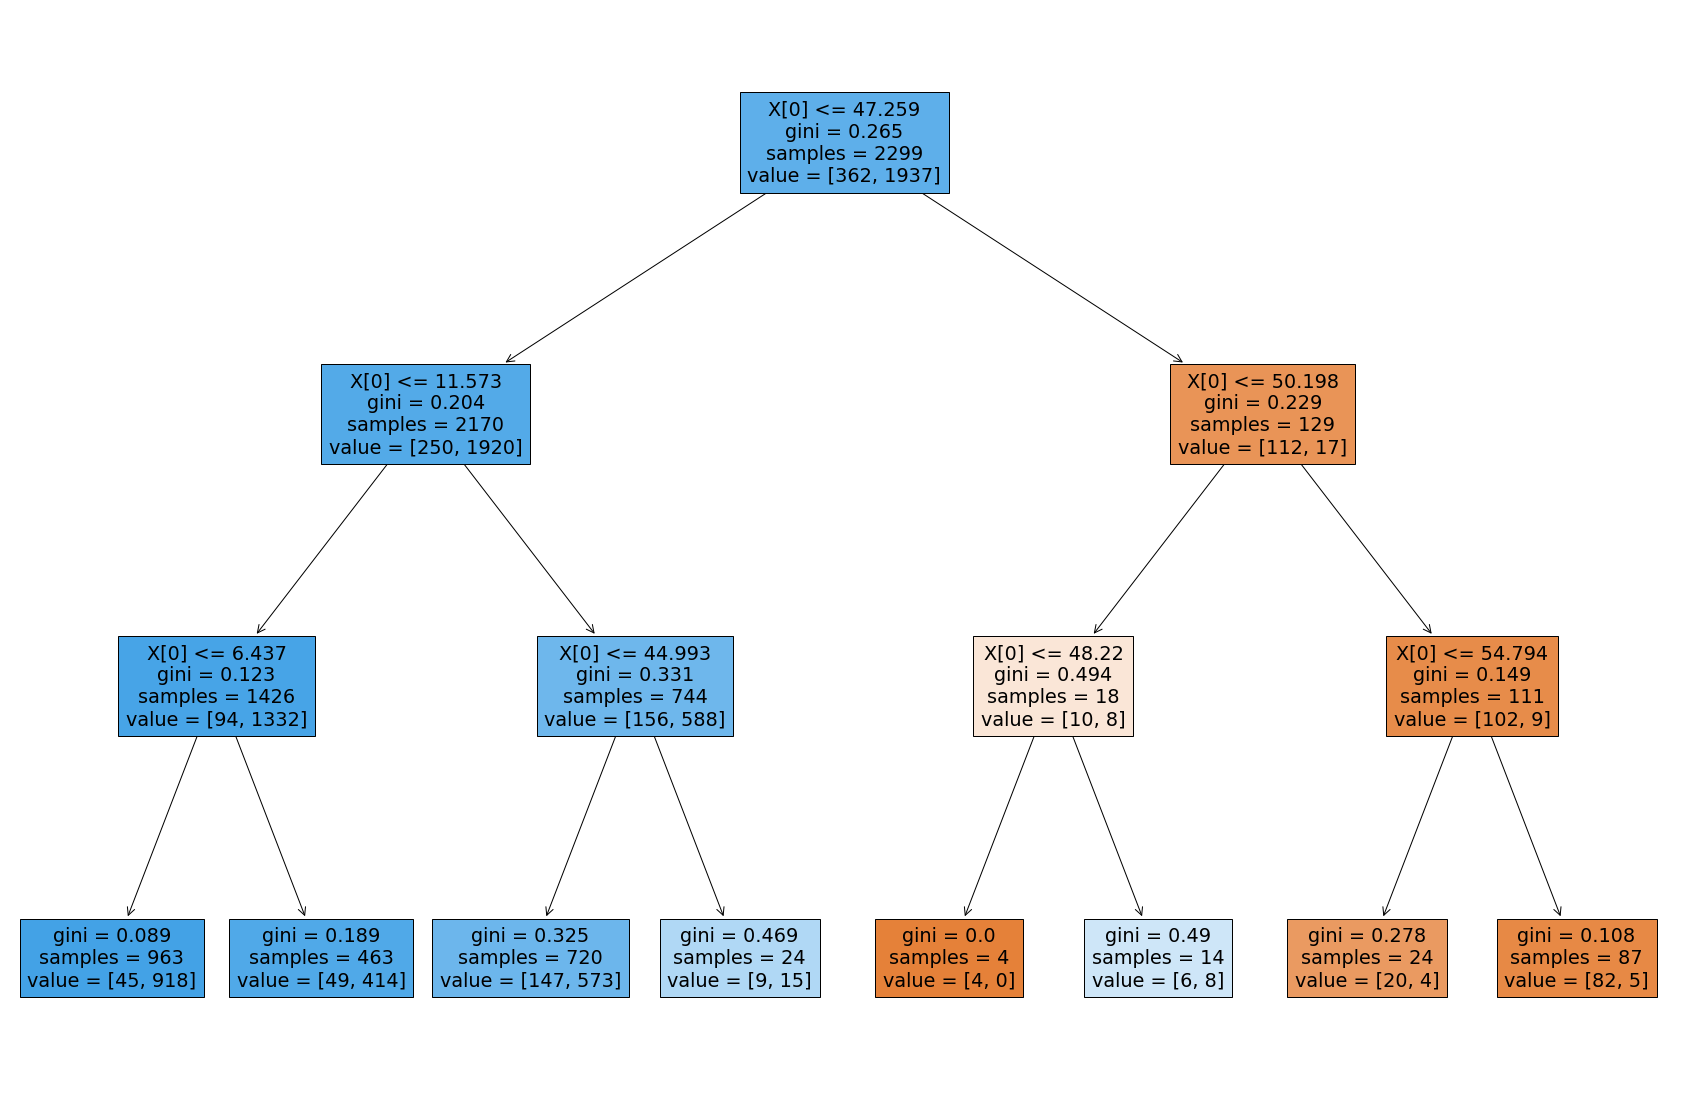

In [8]:
# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dtree, filled=True)


plt.show();

In [9]:
## evaluate your decision tree
cross_val_score(dtree, elect_test['minority'].values.reshape(-1, 1), y_test, cv=10).mean()

0.8578434723171565

## create a new tree with all the parameters, can you interpret it?

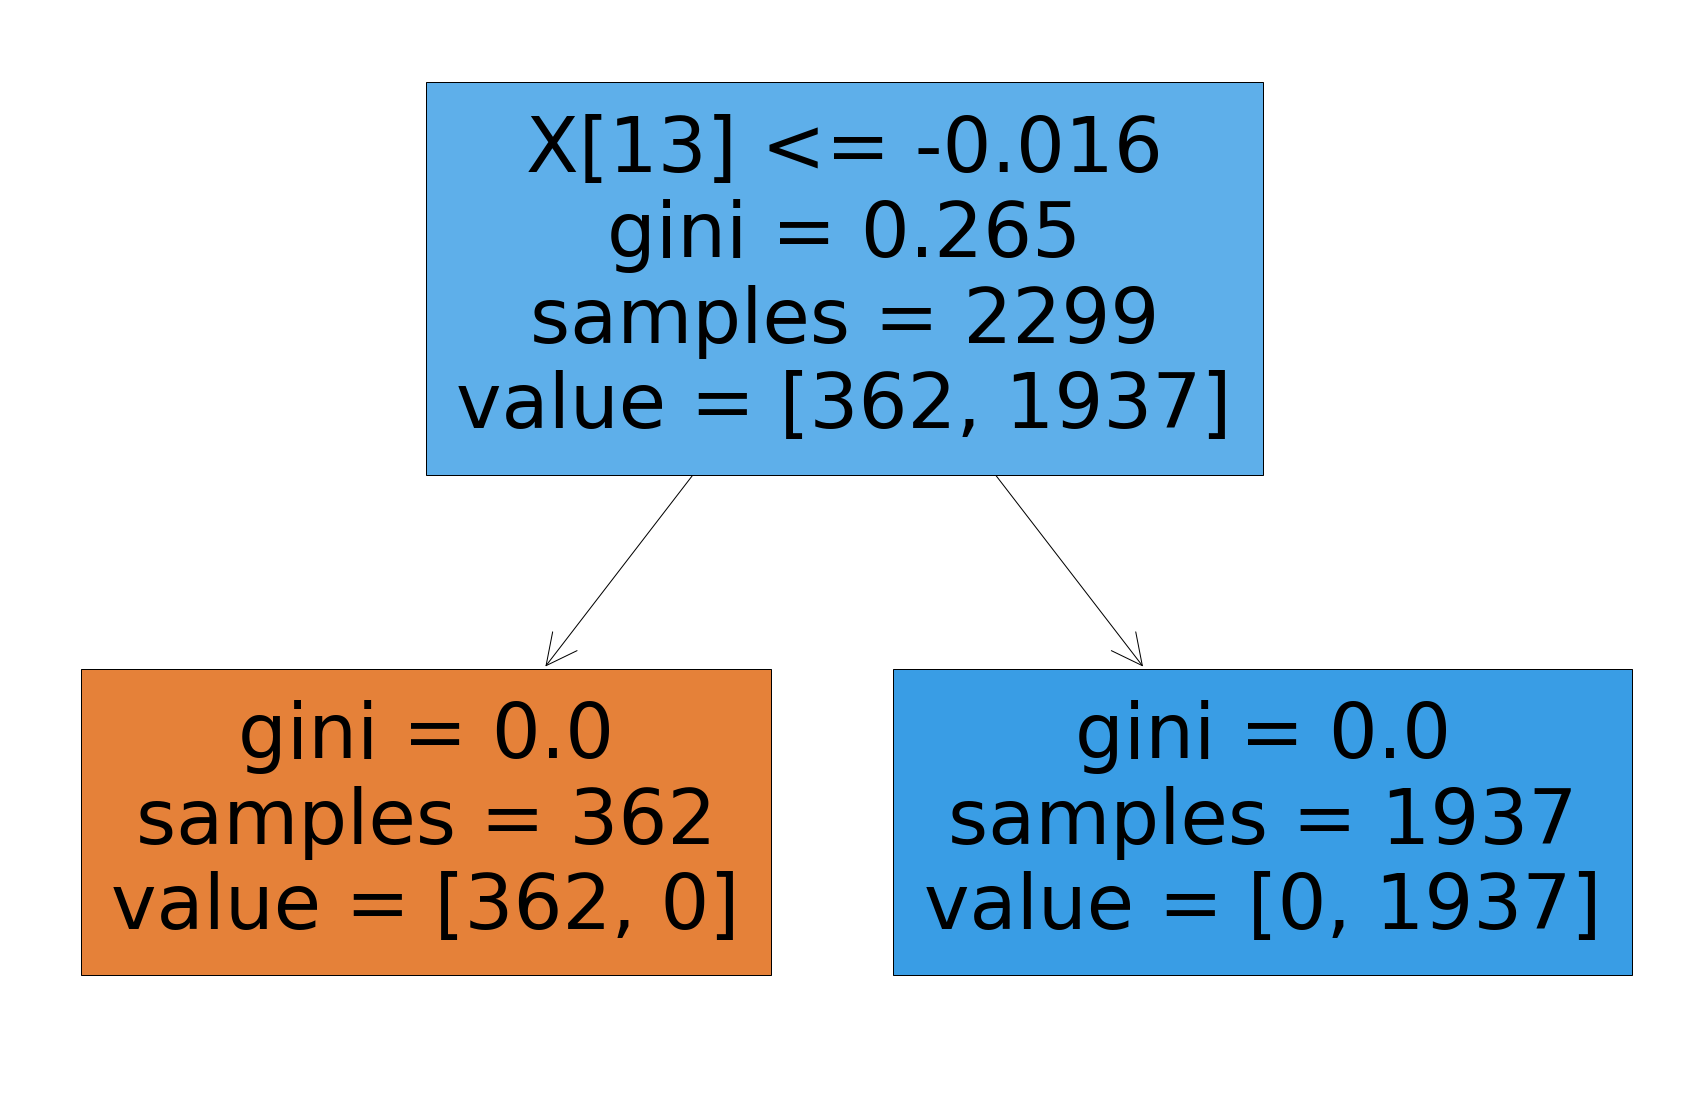

In [10]:
dtree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree2.fit(X = elect_train.drop(['county', 'state'], axis = 1), y = y_train)

# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dtree2, filled=True)


plt.show();

In [11]:
help(tree.plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of strings, default=None
        Name

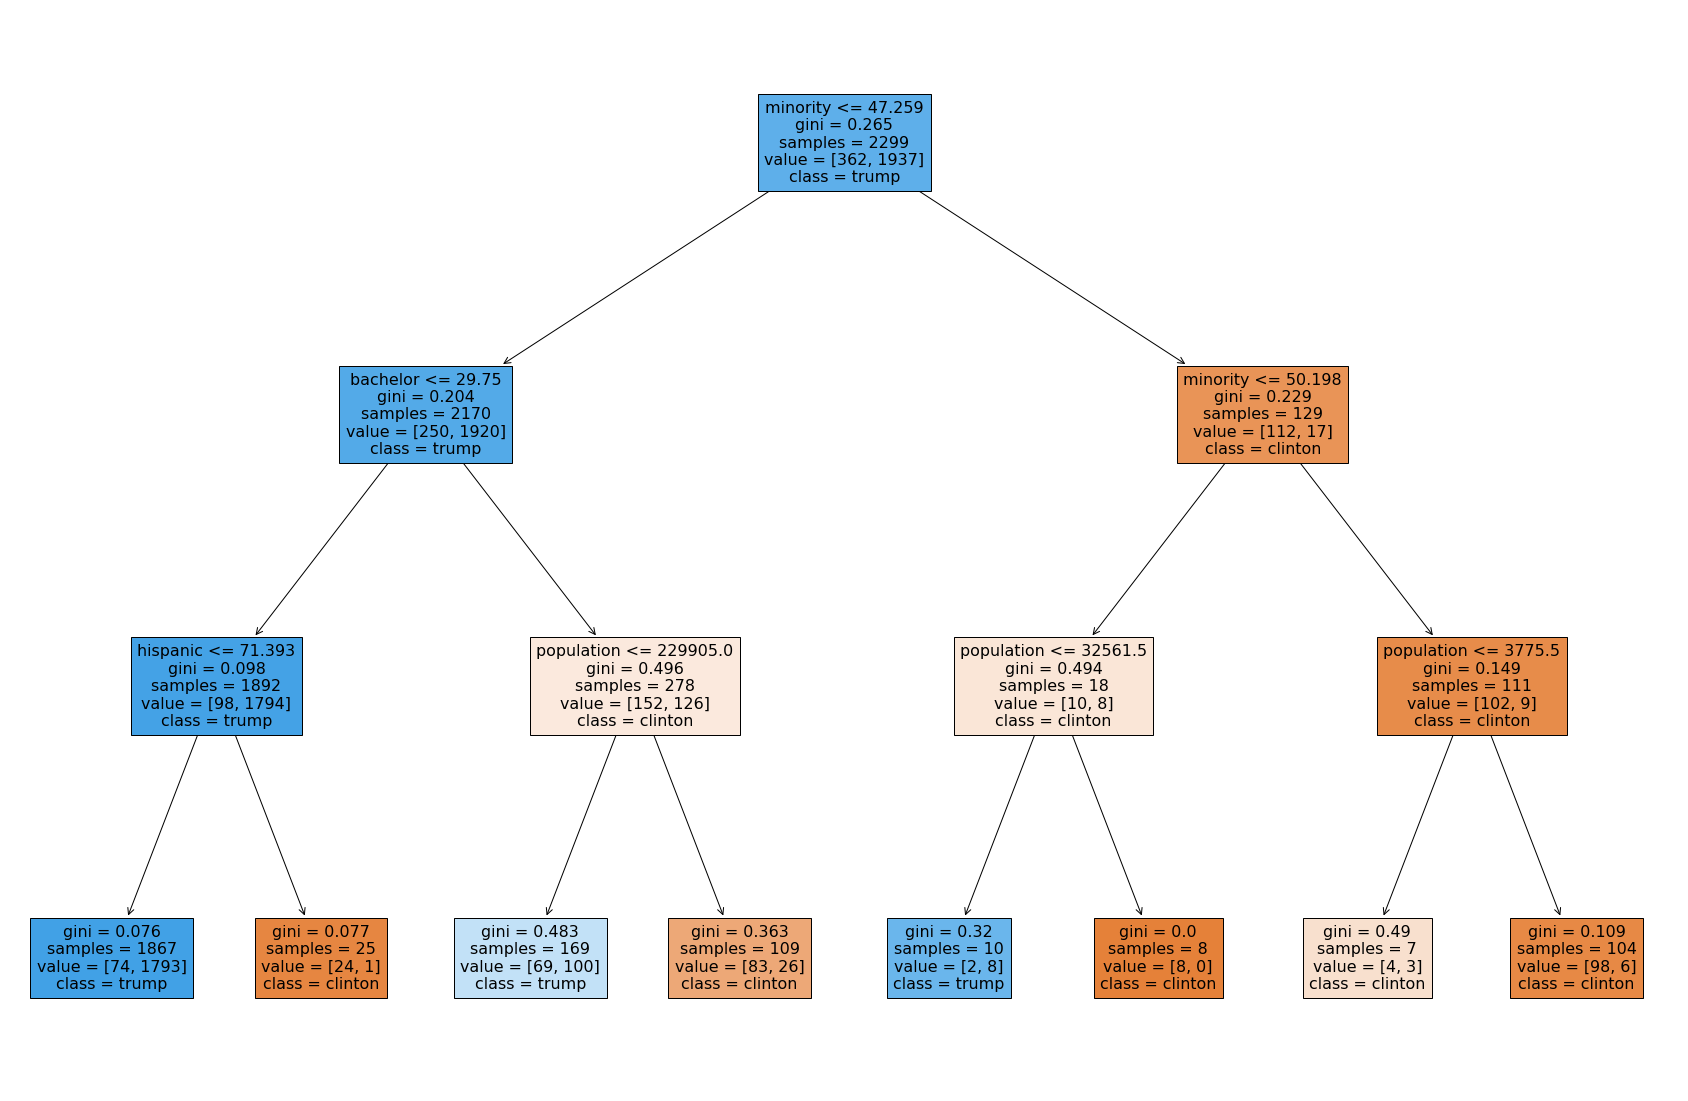

In [16]:
dtree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree2.fit(X = elect_train.drop(['county', 'state', 'trump', 'clinton', 'votergap'], axis = 1), y = y_train)

# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dtree2,
               filled=True,
               feature_names = elect_train.drop(['county', 'state', 'trump', 'clinton', 'votergap'], axis = 1).columns,
               class_names = ['clinton','trump'])


plt.show();

In [14]:
cross_val_score(dtree, elect_test.drop(['county', 'state', 'trump', 'clinton', 'votergap'], axis = 1), y_test, cv=10).mean()

0.8839883800410115